In [2]:
import os
import wfdb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# The MIT-BIH dataset
This notebook demonstrates how to get access to the [MIT-BIH Arrhythmia Database](https://www.physionet.org/physiobank/database/mitdb/). Other people have already developed a python module that lets us easily download and read the data. The module is called [wfdb](https://github.com/MIT-LCP/wfdb-python).

## Downloading the database
Below i use the wfdb package to download the MIT-BIH database to a local folder.

In [7]:
if os.path.isdir("mitdb"):
    print('You already have the data.')
else:
    wfdb.dl_database('mitdb', 'mitdb')

You already have the data.


## Reading a record
Below I read the first 3000 datapoints of a record.

In [32]:
record = wfdb.rdsamp('mitdb/100', sampto=3000)
annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

In [9]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

## Plotting a record
The data contains measurements from two leads. Below I plot both.

Text(0, 0.5, 'Lead II')

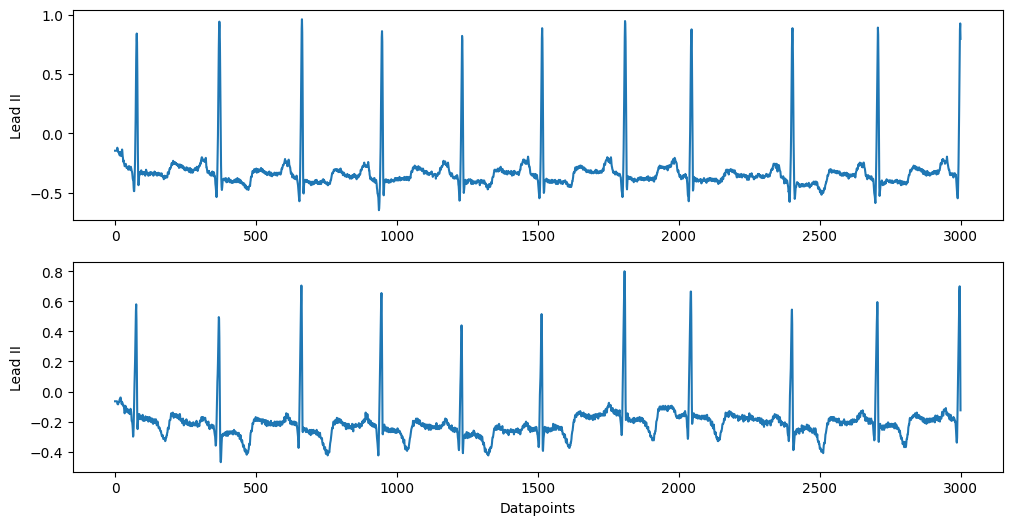

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))
I = record[0][:, 0]
II = record[0][:, 1]

ax[0].plot(I)
ax[1].plot(II)
ax[0].set_ylabel('Lead II')
ax[1].set_xlabel('Datapoints')
ax[1].set_ylabel('Lead II')

In [96]:
column_names = []
data = np.array([])

for n in list(range(100, 235)):
    try:
        record = wfdb.rdsamp(f'mitdb/{n}')
        column_names.append(f"{n}_I")
        column_names.append(f"{n}_II")
        if len(data) == 0:
            data = np.array(record[0])
        else:
            data = np.hstack((data, np.array(record[0])))
    except:
        continue

df = pd.DataFrame(data=data, columns=column_names)
df

,100_I,100_II,101_I,101_II,102_I,102_II,103_I,103_II,104_I,104_II,...,230_I,230_II,231_I,231_II,232_I,232_II,233_I,233_II,234_I,234_II
0,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
1,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
2,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
3,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
4,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649995,-0.075,-0.480,-0.290,-0.100,-0.160,0.255,-0.200,0.100,-0.070,0.195,...,-0.600,-0.150,0.355,-0.190,-0.105,0.000,-0.480,0.295,-0.390,0.070
649996,-0.445,-0.410,-0.295,-0.125,-0.160,0.220,-0.225,0.075,-0.070,0.200,...,-0.605,-0.160,0.355,-0.195,-0.100,0.015,-0.495,0.320,-0.390,0.070
649997,-0.675,-0.365,-0.295,-0.110,-0.170,0.200,-0.235,0.050,-0.065,0.200,...,-0.590,-0.160,0.340,-0.195,-0.070,0.015,-0.495,0.320,-0.395,0.075
649998,-0.765,-0.335,-0.290,-0.110,-0.195,0.195,-0.245,0.055,-0.060,0.205,...,-0.590,-0.145,0.340,-0.190,-0.075,0.035,-0.490,0.340,-0.380,0.080


In [98]:
df.to_csv("mit_bih_arrhythmia.csv", index=False)

In [7]:
column_names_5k = []
data_5k = np.array([])

for n in list(range(100, 235)):
    try:
        record = wfdb.rdsamp(f'mitdb/{n}')
        column_names_5k.append(f"{n}_I")
        column_names_5k.append(f"{n}_II")
        if len(data_5k) == 0:
            data_5k = np.array(record[0][0:5000, :])
        else:
            data_5k = np.hstack((data_5k, np.array(record[0][0:5000, :])))
    except:
        continue

df_5k = pd.DataFrame(data=data_5k, columns=column_names_5k)
df_5k

,100_I,100_II,101_I,101_II,102_I,102_II,103_I,103_II,104_I,104_II,...,230_I,230_II,231_I,231_II,232_I,232_II,233_I,233_II,234_I,234_II
0,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
1,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
2,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
3,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
4,-0.145,-0.065,-0.345,-0.160,-0.200,0.005,-0.375,0.050,-0.150,0.200,...,-0.380,-0.285,-0.200,0.075,-0.245,0.210,-0.095,0.010,-0.080,0.135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-0.240,-0.240,-0.480,-0.080,-0.225,0.660,-0.365,0.110,0.690,0.715,...,-0.315,-0.245,-0.275,0.130,-0.230,0.130,-0.495,-0.035,-0.330,0.055
4996,-0.240,-0.225,-0.480,-0.090,-0.215,0.610,-0.335,0.125,0.275,0.445,...,-0.320,-0.250,-0.280,0.135,-0.230,0.135,-0.510,-0.050,-0.345,0.060
4997,-0.235,-0.220,-0.495,-0.105,-0.225,0.560,-0.320,0.135,0.075,0.190,...,-0.310,-0.250,-0.285,0.135,-0.230,0.130,-0.515,-0.050,-0.345,0.040
4998,-0.225,-0.195,-0.505,-0.105,-0.230,0.520,-0.305,0.140,0.075,0.105,...,-0.295,-0.235,-0.270,0.140,-0.245,0.120,-0.515,-0.060,-0.345,0.030


In [8]:
df_5k.to_csv("mit_bih_arrhythmia_5k.csv", index=False)